# Load Library

In [242]:
from Bio import SeqIO
from pandas import DataFrame
import pandas as pd
import os, sys
from tqdm import tqdm_notebook
import zipfile

# Load Functions

In [243]:
def BGC_counter(refseq):
    gbk_file = refseq
    print (gbk_file)
    df_antismash = DataFrame(columns=("Cluster No","Cluster Type"))
    for seq_record in SeqIO.parse(gbk_file, "genbank"):
        for seq_feat in seq_record.features:
            if seq_feat.type == "cluster":
                cluster_number = seq_feat.qualifiers["note"][0].replace(" ","_").replace(":","")
                cluster_type = seq_feat.qualifiers["product"][0]
                df = pd.DataFrame([[cluster_number, cluster_type]], columns=("Cluster No", "Cluster Type"))
                df_antismash = df_antismash.append(df, ignore_index=True)
    return df_antismash

# Automate analysis

In [252]:
cwd = os.getcwd()
os.chdir(cwd)
#os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
species = pd.read_csv('NCBI_Result.csv')
for i in tqdm_notebook(range(len(species))):
    try:
        refseq = pd.read_csv('Refseq_'+species.loc[i,"Genus"]+'_'+species.loc[i,"Species"]+'.csv')
        #print(os.getcwd())
        #os.chdir("E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        os.chdir(cwd+"/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        print(os.getcwd())
        result = os.listdir()
        for x in range(len(result)):
            if '.zip' in result[x]:
                with zipfile.ZipFile(result[x]) as zip_ref:
                    zip_ref.extractall()
        result = os.listdir()
        #print(result)
        for x in range(len(result)):
            if 'bacteria' in result[x]:
                #print (result[x])
                os.chdir(result[x]+"/")
                print(os.getcwd())
                dir_ref = os.listdir()
                for y in range(len(dir_ref)):
                    if 'final.gbk' in dir_ref[y]:
                        #print (dir_ref[y])
                        df = BGC_counter(dir_ref[y])
                        os.chdir("..")
                        df.to_csv("BGC_count_"+dir_ref[y].replace('.final.gbk','')+".csv")
                #os.chdir("..")
                print(os.getcwd())
            else:        
                #os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')                           
                os.chdir(cwd)
    except OSError:
        #os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')                
        os.chdir(cwd)
        pass

E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes\bacteria-0d831a99-8910-49d3-a1da-d0cad3cd7818
NC_017534.1.final.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes\bacteria-2c2e55ab-be74-42ac-9723-c4f2f2d7c969
NC_017535.1.final.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes\bacteria-d60d4f59-db34-4322-86aa-8a7761637ded
NC_006085.1.final.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes\bacteria-e262a1d6-8929-4950-8b7a-22e19a740944
NC_017550.1.final.gbk
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
E:\Jupyter_Lab\KetiakProject\Genome

# Count BGC

In [253]:
os.chdir('E:/Jupyter_Lab/KetiakProject/Genome Scraping NCBI/')
df_count = DataFrame(columns=("Species", "Strain"))

In [254]:
df_count = DataFrame(columns=("Species", "Strain"))
cwd = os.getcwd()
species = pd.read_csv('NCBI_Result.csv')
for i in tqdm_notebook(range(len(species))):
    try:
        refseq = pd.read_csv('Refseq_'+species.loc[i,"Genus"]+'_'+species.loc[i,"Species"]+'.csv')
        #print(refseq)
        os.chdir(cwd+"/Result/"+species.loc[i,"Genus"]+" "+species.loc[i,"Species"]+"/")
        print(os.getcwd())
        result = os.listdir()
        for x in range(len(result)):
            if 'BGC_count_' in result[x]:
                print(result[x])
                df = pd.read_csv(result[x])
                df2 = df["Cluster Type"].value_counts()
                acc = result[x]
                acc = acc.replace("BGC_count_","")
                acc = acc.replace(".csv","")
                strain = refseq.loc[refseq["Refseq"] == acc, "Strain"]
                df2 = df2.rename(acc)
                df_count = df_count.append(df2)
                df_count.loc[acc, "Species"] = species.loc[i,"Genus"]+" "+species.loc[i,"Species"]
                try:
                    df_count.loc[acc, "Strain"] = strain.values[0]
                except IndexError:
                    pass
                c = df_count.reset_index()
        os.chdir(cwd)
        #else:
            #os.chdir(cwd)
    except OSError:  
        #os.chdir(cwd)
        print('error')
        pass

E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Cutibacterium acnes
BGC_count_NC_006085.1.csv
BGC_count_NC_014039.1.csv
BGC_count_NC_017534.1.csv
BGC_count_NC_017535.1.csv
BGC_count_NC_017550.1.csv
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus epidermidis
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium tuberculostearicum
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus capitis
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium simulans
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Streptococcus mitis
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Staphylococcus hominis
BGC_count_NZ_CP014107.1.csv
BGC_count_NZ_CP020618.1.csv
BGC_count_NZ_LT963438.1.csv
BGC_count_NZ_LT963442.1.csv
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium aurimucosum
E:\Jupyter_Lab\KetiakProject\Genome Scraping NCBI\Result\Corynebacterium kroppenstedtii
BGC_count_NC_

In [259]:
c = c.fillna(0)
c.to_csv("03_BGC_Result.csv")
c

,index,Species,Strain,bacteriocin,nrps,thiopeptide,siderophore,terpene,lantipeptide
0,NC_006085.1,Cutibacterium acnes,KPA171202,1.0,1.0,1.0,0.0,0.0,0.0
1,NC_014039.1,Cutibacterium acnes,SK137,1.0,0.0,0.0,0.0,0.0,0.0
2,NC_017534.1,Cutibacterium acnes,266,1.0,1.0,0.0,0.0,0.0,0.0
3,NC_017535.1,Cutibacterium acnes,6609,1.0,1.0,1.0,0.0,0.0,0.0
4,NC_017550.1,Cutibacterium acnes,ATCC 11828,0.0,1.0,0.0,0.0,0.0,0.0
5,NZ_CP014107.1,Staphylococcus hominis,0,0.0,0.0,0.0,1.0,0.0,0.0
6,NZ_CP020618.1,Staphylococcus hominis,K1,0.0,0.0,0.0,1.0,1.0,0.0
7,NZ_LT963438.1,Staphylococcus hominis,0,0.0,0.0,0.0,1.0,1.0,1.0
8,NZ_LT963442.1,Staphylococcus hominis,0,0.0,0.0,0.0,1.0,1.0,1.0
9,NC_012704.1,Corynebacterium kroppenstedtii,DSM 44385,0.0,1.0,0.0,0.0,1.0,0.0


In [269]:
import seaborn as sns; sns.set()
import numpy as np

df3 = c.drop(columns=["index", "Strain"])
df3 = df3.set_index('Species')
df3
#Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
#Cols = ['A', 'B', 'C', 'D']
#df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)
#df2 = DataFrame()



,bacteriocin,nrps,thiopeptide,siderophore,terpene,lantipeptide
Species,,,,,,
Cutibacterium acnes,1.0,1.0,1.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,0.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,0.0,0.0,0.0,0.0
Cutibacterium acnes,1.0,1.0,1.0,0.0,0.0,0.0
Cutibacterium acnes,0.0,1.0,0.0,0.0,0.0,0.0
Staphylococcus hominis,0.0,0.0,0.0,1.0,0.0,0.0
Staphylococcus hominis,0.0,0.0,0.0,1.0,1.0,0.0
Staphylococcus hominis,0.0,0.0,0.0,1.0,1.0,1.0
Staphylococcus hominis,0.0,0.0,0.0,1.0,1.0,1.0


Text(0.5,16,'Biosynthetic Gene Clusters')

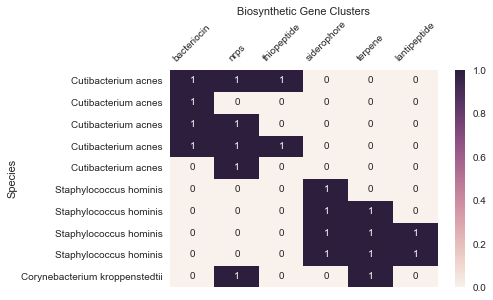

In [306]:
%matplotlib inline
g = sns.heatmap(df3, annot=True, cbar_kws={"orientation":"vertical"})
g.set_xticklabels(g.get_xticklabels(), rotation = 45)
g.xaxis.set_ticks_position('top')
g.xaxis.set_label_position('top')
g.set_xlabel('Biosynthetic Gene Clusters')